In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
#Library

In [2]:
df = pd.read_csv("/kaggle/input/temperature-and-ice-cream-sales/Ice Cream Sales - temperatures.csv")
df.head(15)

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02
5,43,15.88
6,44,19.07
7,44,19.57
8,45,21.62
9,45,22.34


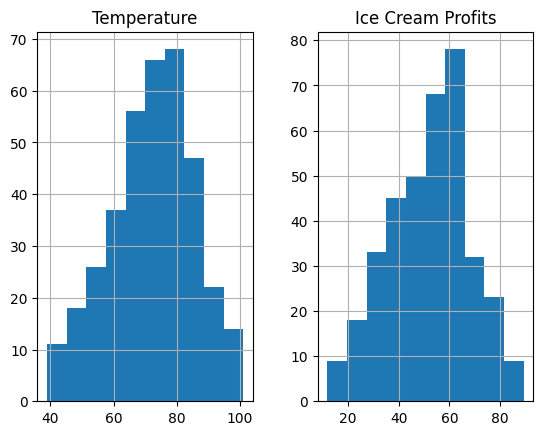

In [3]:
viz = df[['Temperature', 'Ice Cream Profits']]
viz.hist()
plt.show()

In [4]:
msk = np.random.ranf(len(df)) < 0.7
train = df[msk]
test = df[~msk]
print(msk)

[False  True  True  True False  True  True  True False  True  True  True
  True  True False  True False  True False  True  True  True  True  True
 False  True  True  True False  True False False  True False  True  True
  True  True False False False  True  True  True  True  True  True False
 False False  True False  True False  True  True  True False False  True
  True  True False False False  True  True  True  True  True  True False
  True  True  True  True False False False False False False False  True
 False  True  True  True  True False False  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True False  True
  True  True  True  True  True False  True False  True False  True False
  True False  True  True False  True  True  True  True False  True  True
  True  True False  True  True  True False False  True  True  True  True
 False False False False False False  True False  True  True False False
  True False  True  True  True  True  True False  T

In [5]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Temperature']])
train_y = np.asanyarray(train[['Ice Cream Profits']])
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


Coefficients:  [[1.19093041]]
Intercept:  [-33.78074295]


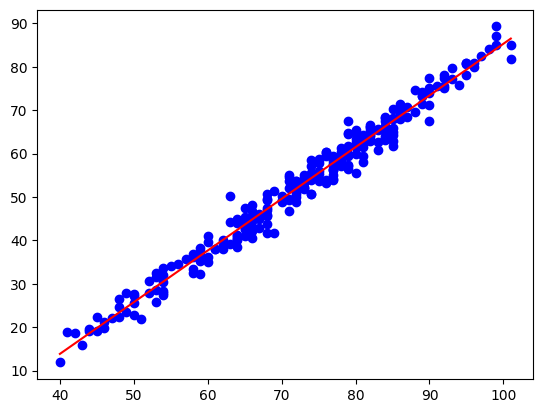

In [6]:
plt.scatter(train['Temperature'], train['Ice Cream Profits'],  color='blue')

plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')


In [7]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Temperature']])
test_y = np.asanyarray(test[['Ice Cream Profits']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 1.91
Residual sum of squares (MSE): 6.20
R2-score: 0.97
